In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd 'drive/My Drive/Siamese/Localization'

/content/drive/My Drive/Siamese/Localization


In [3]:
import sys
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')
sys.path.insert(0, '../Speaker')

In [4]:
!pip install pyroomacoustics==0.3.1
!pip install cookiecutter

     |████████████████████████████████| 174kB 2.7MB/s 
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.3.1-cp36-cp36m-linux_x86_64.whl size=495217 sha256=e59f7fb8192a0c8d3e772ee579fc27f0ac6f56dbc71bd4511b78c097ec647824
  Stored in directory: /root/.cache/pip/wheels/c0/52/61/0ddd138323a04e990d2d3e87376aaddd19cecad171f0d0df7d
Successfully built pyroomacoustics
     |████████████████████████████████| 51kB 2.7MB/s 


In [5]:
import os
import numpy as np
import torch

import matplotlib.pyplot as plt

In [6]:
from torchvision.transforms import Compose
from Normalize import Normalize
from ToTensor import ToTensor
from IdentificationDataset import IdentificationDataset

DATASET_PATH = '/content/drive/My Drive/DataSet'
NUM_CLASSES = 10
B = 6
NUM_WORKERS =1 

transforms = Compose([
    Normalize(),
    ToTensor()
])

trainset = IdentificationDataset(DATASET_PATH, 
                                 NUM_CLASSES,
                                 train=True, 
                                 transform=transforms)
trainsetloader = torch.utils.data.DataLoader(trainset, 
                                             batch_size=B, 
                                             num_workers=NUM_WORKERS, 
                                             shuffle=True)

sample lenght  1


In [7]:
for (gold_label, sample) in trainsetloader:
  break

print(sample.size())

torch.Size([6, 16000])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

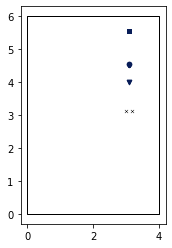

In [8]:
import random
import IPython
import pyroomacoustics as pra

from scipy.io import wavfile

# Create a 4 by 6 metres shoe box room
room = pra.ShoeBox([4, 6], fs=16000)

x = random.uniform(0.5, 3.5)
my = random.uniform(0.5, 3.5)

# Create 2 microphones
# 20 cm between
R = np.c_[
    [x-0.1, my],  # mic 1
    [x+0.1, my],  # mic 2
    ]
room.add_microphone_array(pra.Beamformer(R, room.fs))

for i in range(4):
  # Add a source somewhere in the room
  signal = sample[i]
  sy = random.uniform(0.5, 3)
  room.add_source([x, my+sy], signal=signal, delay=i)
fig, ax = room.plot()


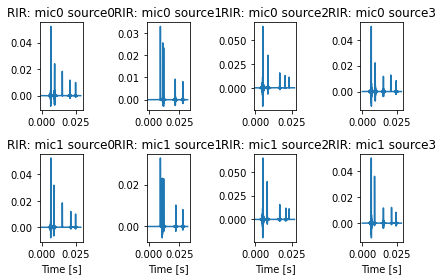

In [9]:
# Compute the RIR using the hybrid method
room.compute_rir()
# Plot and apply the RIR on the audio file
room.plot_rir()
plt.show()


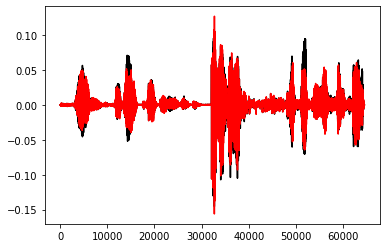

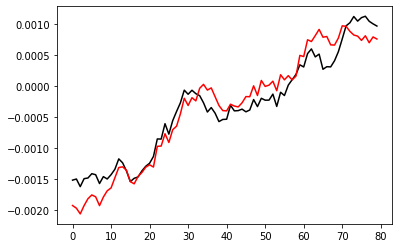

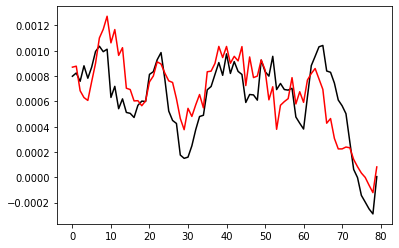

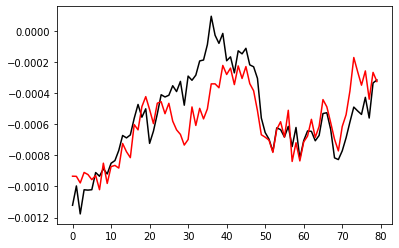

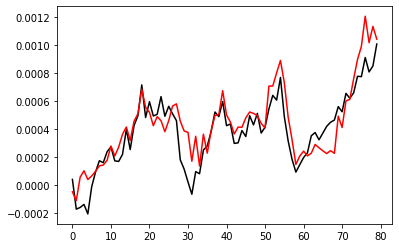

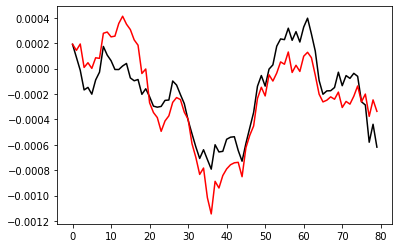

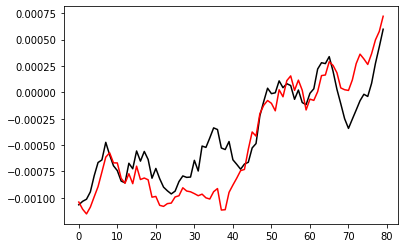

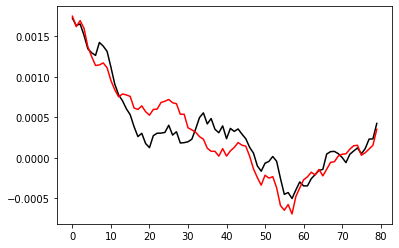

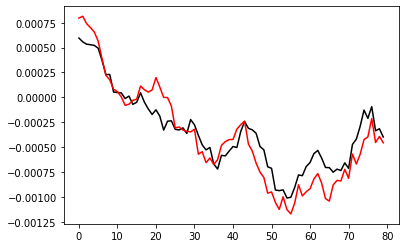

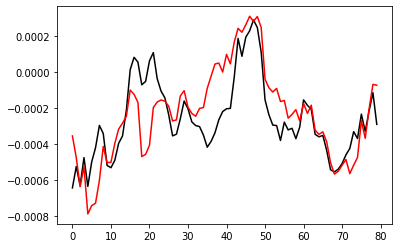

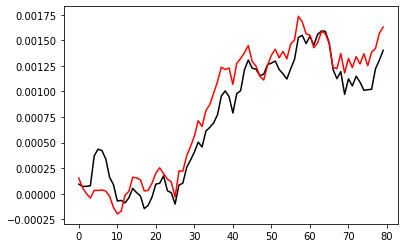

In [10]:
room.simulate()
mic1 = room.mic_array.signals[0,:]
mic2 = room.mic_array.signals[1,:]
plt.figure()
plt.plot([i for i in range(len(mic1))], mic1, label='mic1', color='black')
plt.plot([i for i in range(len(mic2))], mic2, label='mic2', color='red')
plt.show()
frag=80
for start in range(2000, 3000, 100):
  plt.figure()
  plt.plot([i for i in range(frag)], mic1[start:start+frag], label='mic1', color='black')
  plt.plot([i for i in range(frag)], mic2[start:start+frag], label='mic2', color='red')
  plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

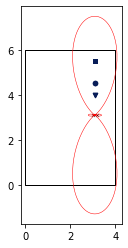

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

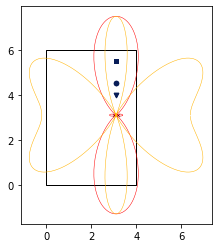

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

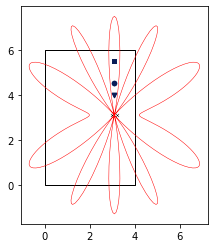

In [11]:
# Now compute the delay and sum weights for the beamformer
room.mic_array.rake_delay_and_sum_weights(room.sources[0][:1])

# plot the room and resulting beamformer
room.plot(freq=[1000], img_order=0)
plt.show()
room.plot(freq=[1000, 2000], img_order=0)
plt.show()
room.plot(freq=[4000], img_order=0)
plt.show()


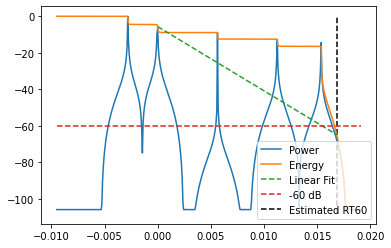

The RT60 is 17 ms


In [12]:
t60 = pra.experimental.measure_rt60(room.rir[0][0], fs=room.fs, plot=True)
print(f"The RT60 is {t60 * 1000:.0f} ms")


In [13]:
# original signal
print("Original WAV:")
IPython.display.Audio(signal, rate=room.fs)

Original WAV:


In [14]:
print("Simulated propagation to first mic:")
IPython.display.Audio(room.mic_array.signals[0,:], rate=room.fs)

Simulated propagation to first mic:


In [15]:
print("Simulated propagation to second mic:")
IPython.display.Audio(room.mic_array.signals[1,:], rate=room.fs)


Simulated propagation to second mic:


In [16]:
print("Simulated propagation to mics:")
IPython.display.Audio(room.mic_array.signals, rate=room.fs)

Simulated propagation to mics:


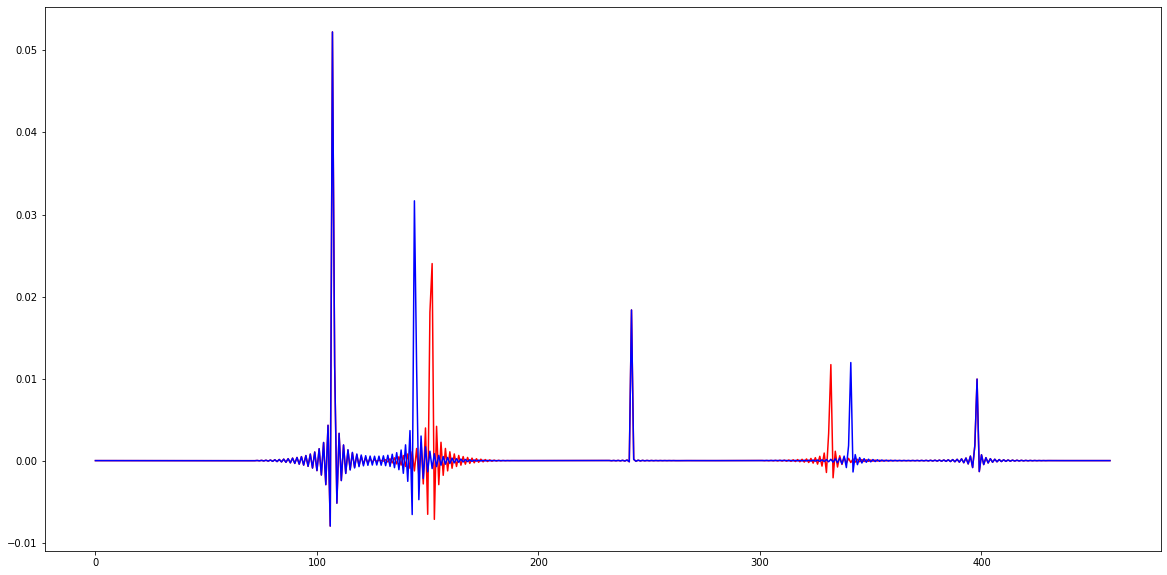

In [17]:
room.compute_rir()

# plot the RIR between mic 1 and source 0
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.plot(room.rir[0][0], color='red')
plt.plot(room.rir[1][0], color='blue')
plt.show()

